# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | pokrovsk
Processing Record 3 of Set 1 | salinas
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | sovetskiy
Processing Record 6 of Set 1 | khouribga
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | ar ruways
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | uvira
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | kharovsk
Processing Record 20 of Set 1 | lieksa
Processing Record 21 of Set 1 | yambio
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,12.19,76,40,5.66,US,1707081858
1,pokrovsk,48.2820,37.1758,2.79,90,100,5.42,UA,1707081859
2,salinas,36.6777,-121.6555,17.29,83,75,13.38,US,1707081859
3,avarua,-21.2078,-159.7750,29.03,74,20,2.57,CK,1707081859
4,sovetskiy,61.3614,63.5842,-17.28,92,97,2.24,RU,1707081860


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,12.19,76,40,5.66,US,1707081858
1,pokrovsk,48.2820,37.1758,2.79,90,100,5.42,UA,1707081859
2,salinas,36.6777,-121.6555,17.29,83,75,13.38,US,1707081859
3,avarua,-21.2078,-159.7750,29.03,74,20,2.57,CK,1707081859
4,sovetskiy,61.3614,63.5842,-17.28,92,97,2.24,RU,1707081860


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

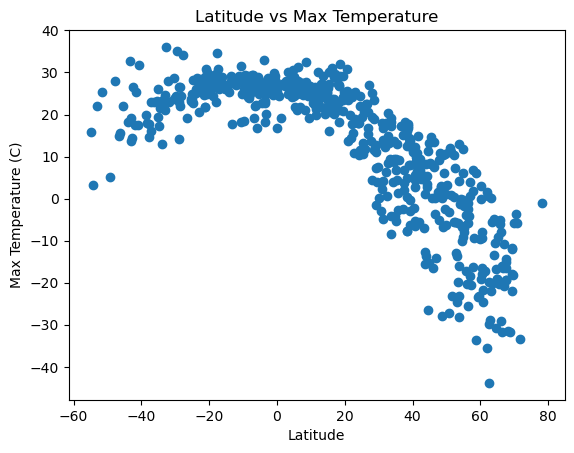

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(" City Latitude vs Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

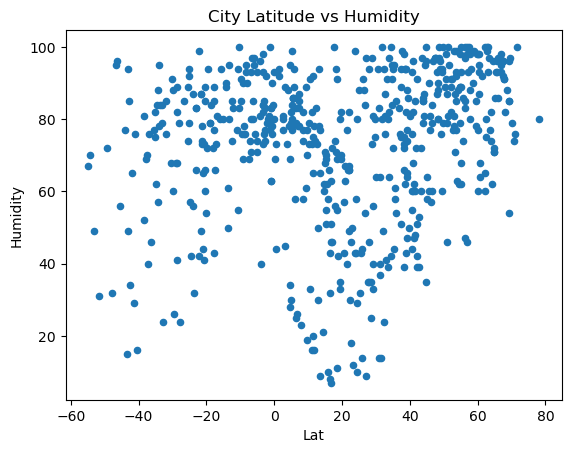

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = "Humidity", title = "City Latitude vs Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

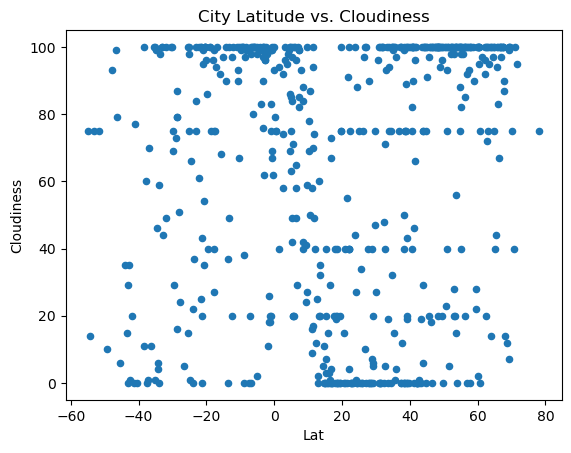

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness", title = "City Latitude vs. Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

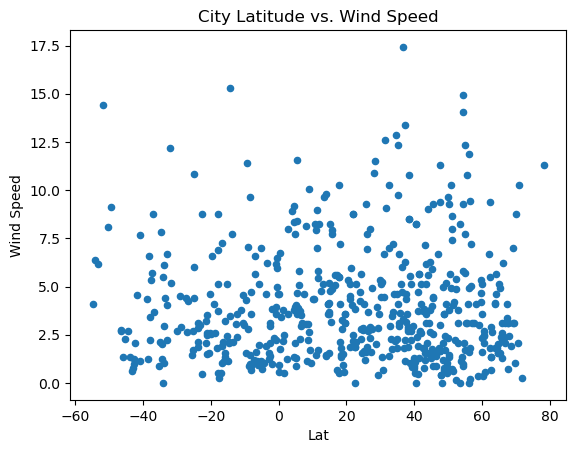

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = "Wind Speed", title = "City Latitude vs. Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots

def regression (x_axis, y_axis, y_label, coordinates):
    slope = linregress(x_axis, y_axis)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "-r")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f'The r-value is {rvalue}')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fortuna,40.5982,-124.1573,12.19,76,40,5.66,US,1707081858
1,pokrovsk,48.2820,37.1758,2.79,90,100,5.42,UA,1707081859
2,salinas,36.6777,-121.6555,17.29,83,75,13.38,US,1707081859
4,sovetskiy,61.3614,63.5842,-17.28,92,97,2.24,RU,1707081860
5,khouribga,32.9333,-6.6000,13.11,41,93,2.67,MA,1707081860


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,avarua,-21.2078,-159.7750,29.03,74,20,2.57,CK,1707081859
7,invercargill,-46.4000,168.3500,15.57,96,79,3.13,NZ,1707081634
12,adamstown,-25.0660,-130.1015,24.99,79,98,4.50,PN,1707081862
13,uvira,-3.4067,29.1458,23.15,82,100,0.78,CD,1707081862
14,grytviken,-54.2811,-36.5092,3.22,70,14,5.63,GS,1707081862


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8615530221109903


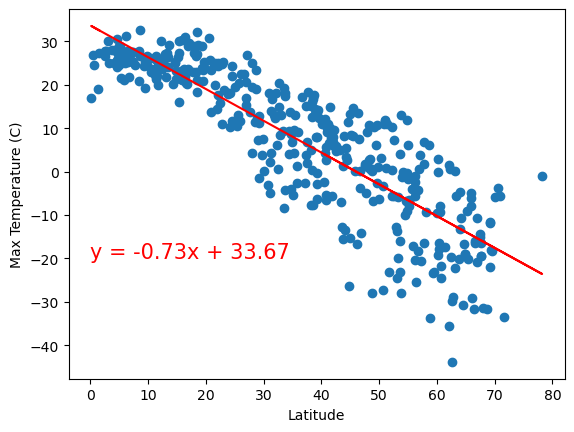

In [27]:
# Linear regression on Northern Hemisphere
regression (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature (C)", (0,-20))


The r-value is 0.45439144616289373


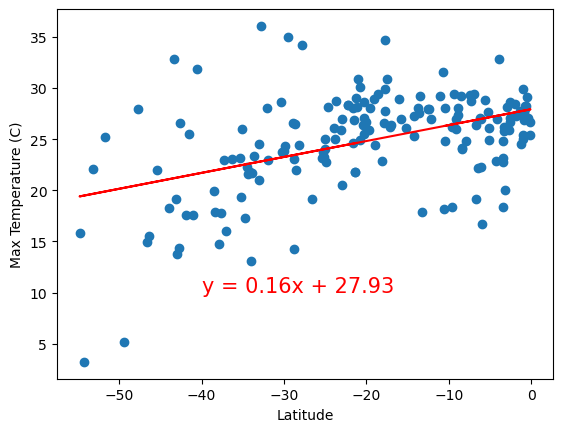

In [29]:
# Linear regression on Southern Hemisphere
regression (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature (C)", (-40,10))

**Discussion about the linear relationship:** As the latitude gets closer to 0 (the equator), the max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3819097082210125


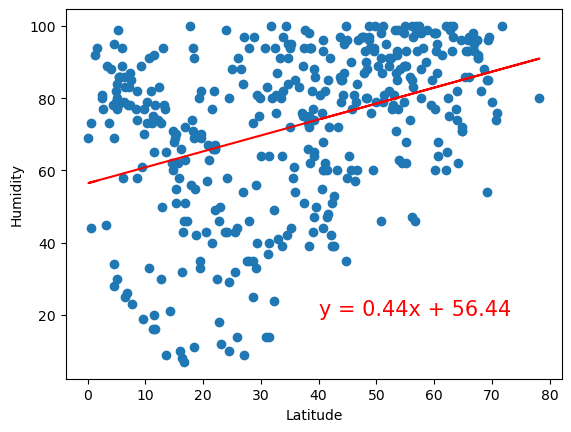

In [30]:
# Northern Hemisphere
regression (northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40,20))

The r-value is 0.3850140156708812


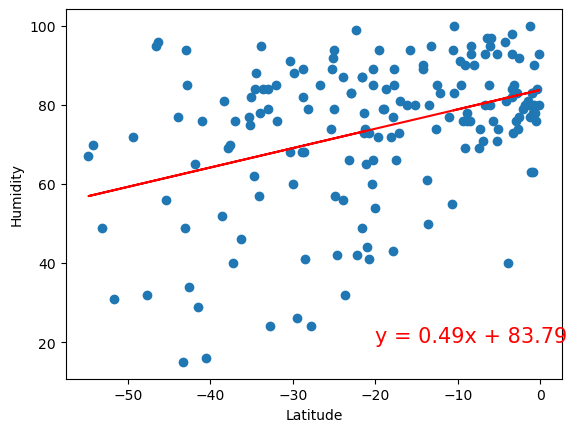

In [38]:
# Southern Hemisphere
regression (southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-20,20))

**Discussion about the linear relationship:** Generally, the closer to the equator (Lat 0), the more humid an area is. That seems to be less true in the northern hemisphere, wher it seems to get more humid further from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2887219888122743


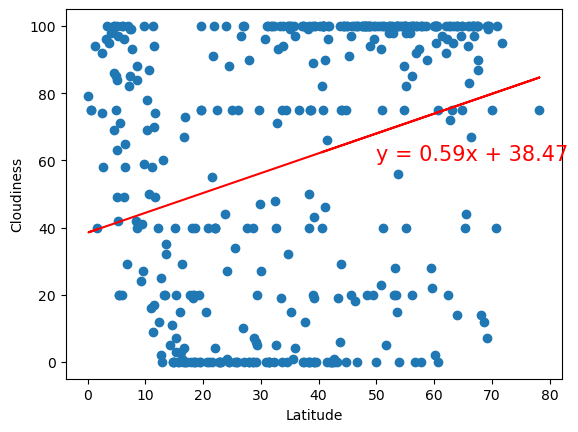

In [32]:
# Northern Hemisphere
regression (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (50,60))

The r-value is 0.2887219888122743


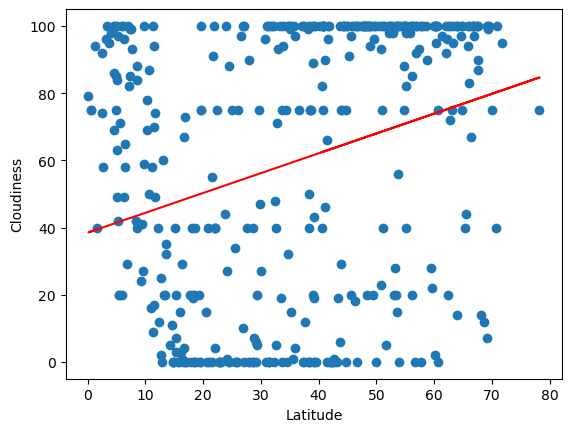

In [33]:
# Southern Hemisphere
regression (northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (-50,40))

**Discussion about the linear relationship:** Similiar to humidity, both the northern and southern hemisphere have positive linear relationships. For the northern hemisphere, it gets cloudier further from the equator, and in the southern hemisphere, it gets cloudier closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.006156203061258193


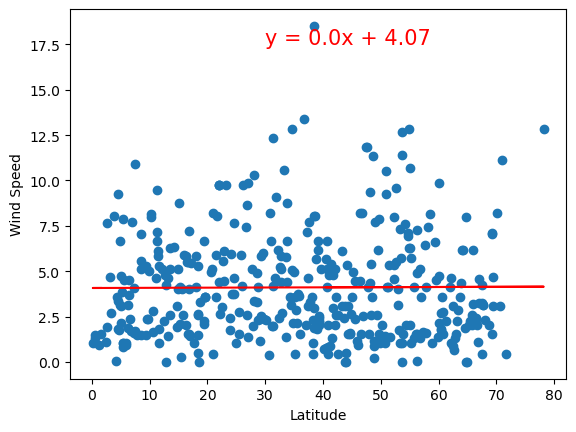

In [34]:
# Northern Hemisphere
regression (northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (30,17.5))

The r-value is -0.21958435689014477


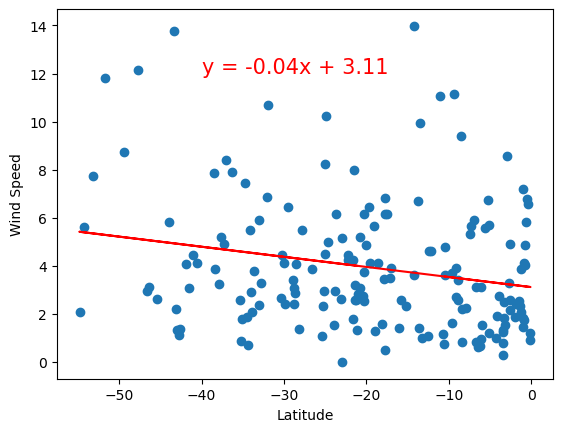

In [37]:
# Southern Hemisphere
regression (southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-40,12))

**Discussion about the linear relationship:** There is a very low linear relationship between latitude and wind speed. In the northern hemisphere, the line is almost flat, and in the southern hemispher, they have a very shallow line.